In [68]:
import json,glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
date

170807

In [82]:
counts_file=glob.glob('Count_v2_ID_nms_Track_merged_P*')
events=[]
for c in counts_file:
    root = c.split('/')[-1]
    id_file= root.split('_')[10]#9
    date=int(id_file[:6])
    hour=int(id_file[6:8])
    if date == 171129:
        continue
    if hour < 7:
        continue
    print(hour)
    with open(c) as file:
        count= json.load(file)
    #hp=(count['entrance_leaving']+count['ramp_leaving']-count['leaving_entrance']-count['ramp_entrance'])/(count['entrance_leaving']+count['ramp_leaving']+count['leaving_entrance']+count['ramp_entrance'])
    if 'pollen' in count:
        events.append([date,hour,count['leaving'], count['entering'],
                             count['inside'],  count['inside_out'],
                             count['inside_ramp'], count['ramp_outside'],
                             count['ramp_inside'], count['outside'],
                             count['outside_inside'], count['outside_ramp'],count['pollen']])
    else:
        events.append([date,hour,count['leaving'], count['entering'],
                             count['inside'],  count['inside_out'],
                             count['inside_ramp'], count['ramp_outside'],
                             count['ramp_inside'], count['outside'],
                             count['outside_inside'], count['outside_ramp'],0])
EV=pd.DataFrame(events,columns=['date','Hour','Entrances','Exits',
                                'inside', 'inside_out', 'inside_ramp',
                                'ramp_outside', 'ramp_inside', 'outside',
                                'outside_inside','outside_ramp','Pollen'])
EV=EV.sort_values(by='Hour')

8
18
11
10
14
9
17
17
11
10
14
16
8
9
15
16
15
18
13
7
11
10
16
8
11
18
13
12
13
15
14
12
13
10
11
10
14
8
12
17
18
8
18
9
10
13
15
11
16
12
16
18
8
17
10
17
14
8
9
7
12
14
9
9
16
10
10
13
13
17
12
15
17
10
18
16
13
18
14
8
7
16
17
14
9
7
9
15
15
15
15
9
18
8
9
13
11
16
9
12
12
17
8
14
12
7
11


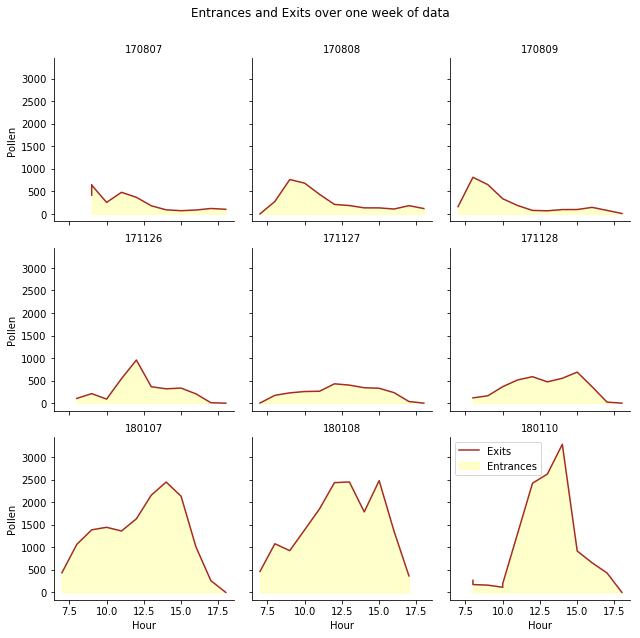

In [83]:
# Create a grid : initialize it
legend = [ 'Exits','Entrances','Pollen']

g = sns.FacetGrid(EV, col='date', hue='date', col_wrap=3, )
# Add the line over the area with the plot function
#g = g.map(plt.plot, 'Hour', 'Exits',alpha=0.1,color='g')
#g = g.map(plt.plot, 'Hour', 'Entrances',alpha=0.1,color='r')
#g = g.map(plt.bar, 'Hour', 'Pollen',alpha=0.1,color='brown')
#g = g.map(plt.plot, 'Hour', 'Exits',color='g')
#g = g.map(plt.plot, 'Hour', 'Entrances',color='r')
g = g.map(plt.plot, 'Hour', 'Pollen',color='brown')
 
# Fill the area with fill_between
#g = g.map(plt.fill_between, 'Hour', 'Exits', alpha=0.2,color='r').set_titles("{col_name} Hour")
#g = g.map(plt.fill_between, 'Hour', 'Entrances', alpha=0.2,color='g').set_titles("{col_name} Hour")
g = g.map(plt.fill_between, 'Hour', 'Pollen', alpha=0.2,color='yellow').set_titles("{col_name} Hour")

# Control the title of each facet
g = g.set_titles("{col_name}")

plt.legend(legend)
# Add a title for the whole plo
plt.subplots_adjust(top=0.9)

g = g.fig.suptitle('Entrances and Exits over one week of data')
plt.savefig('Pollen_hurricane.png')
plt.show()


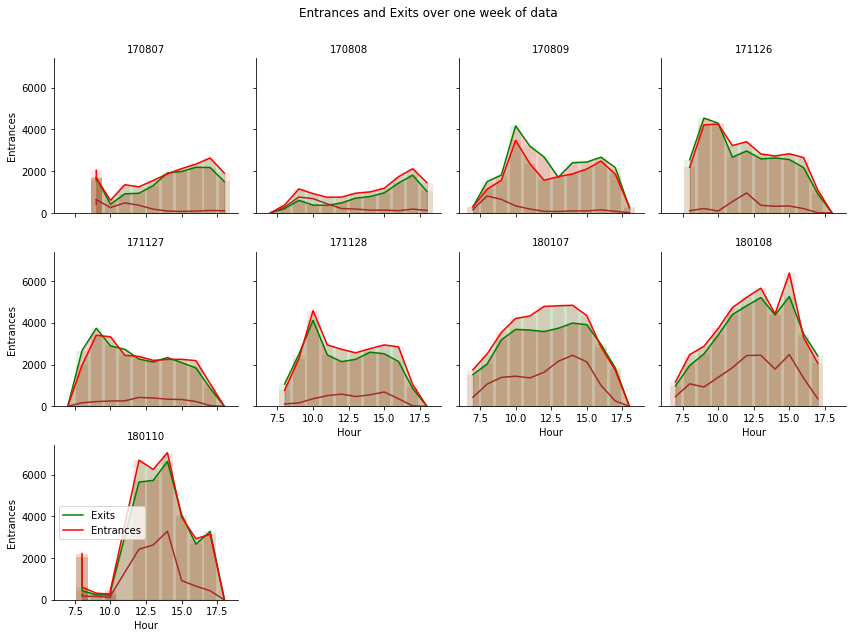

In [85]:
# Create a grid : initialize it
legend = [ 'Exits','Entrances']

g = sns.FacetGrid(EV, col='date', hue='date', col_wrap=4, )
# Add the line over the area with the plot function
g = g.map(plt.bar, 'Hour', 'Exits',alpha=0.1,color='g')
g = g.map(plt.bar, 'Hour', 'Entrances',alpha=0.1,color='r')
#g = g.map(plt.bar, 'Hour', 'Pollen',alpha=0.1,color='brown')
g = g.map(plt.plot, 'Hour', 'Exits',color='g')
g = g.map(plt.plot, 'Hour', 'Entrances',color='r')
g = g.map(plt.plot, 'Hour', 'Pollen',color='brown')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Hour', 'Exits', alpha=0.2,color='r').set_titles("{col_name} Hour")
g = g.map(plt.fill_between, 'Hour', 'Entrances', alpha=0.2,color='g').set_titles("{col_name} Hour")


# Control the title of each facet
g = g.set_titles("{col_name}")

plt.legend(legend)
# Add a title for the whole plo
plt.subplots_adjust(top=0.9)

g = g.fig.suptitle('Entrances and Exits over one week of data')
plt.savefig('Entrances_exits_hurricane.png')
plt.show()


In [72]:
merged = glob.glob('../Data/Videos/Hurricane/OUTPUT/merged*')

In [73]:
len(merged)

110

In [74]:
files = glob.glob('../Data/Videos/Hurricane/*.mp4')

In [75]:
files = [f for f in files if int(f.split('_')[3][6:8])>8 and int(f.split('_')[3][6:8])<18]
         
         
         

In [76]:
files

[]

In [77]:
len(files)

0

In [78]:
merged[0].split('_')[3]

'R'

In [79]:
merged = glob.glob('Hurricane_events/Count*')

In [80]:
len(merged)

110